In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Diabetes.csv')

# Display the first few rows
print(data.head())

   Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
0            1       85              66              29        0  26.6   
1            8      183              64               0        0  23.3   
2            1       89              66              23       94  28.1   
3            0      137              40              35      168  43.1   
4            5      116              74               0        0  25.6   

   Diabetes_Pedigree_Function  Age  Outcome  
0                       0.351   31        0  
1                       0.672   32        1  
2                       0.167   21        0  
3                       2.288   33        1  
4                       0.201   30        0  


In [ ]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Split features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Confusion Matrix:
 [[81 16]
 [17 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        97
           1       0.71      0.70      0.71        57

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.78      0.79      0.79       154



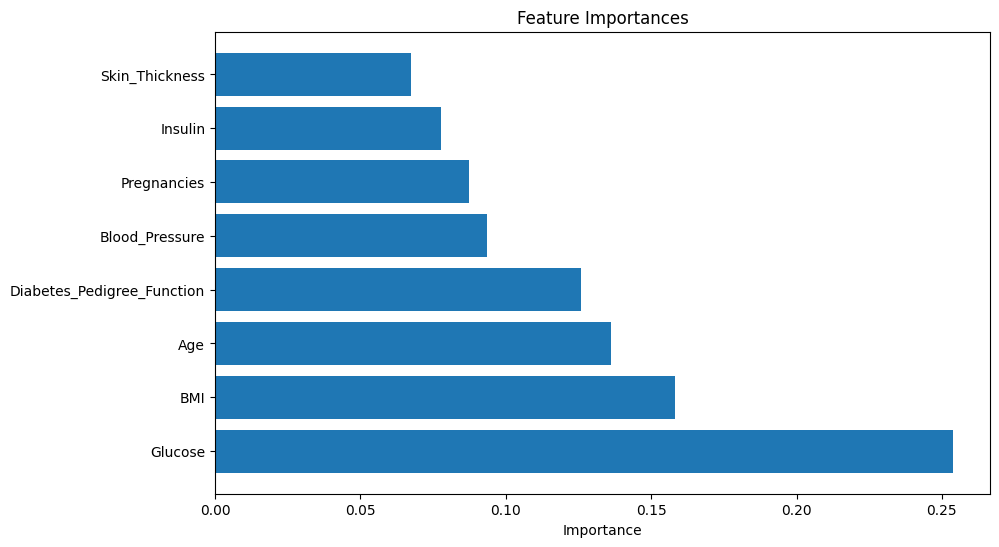

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Importance')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 77.06%


In [ ]:
import seaborn as sns

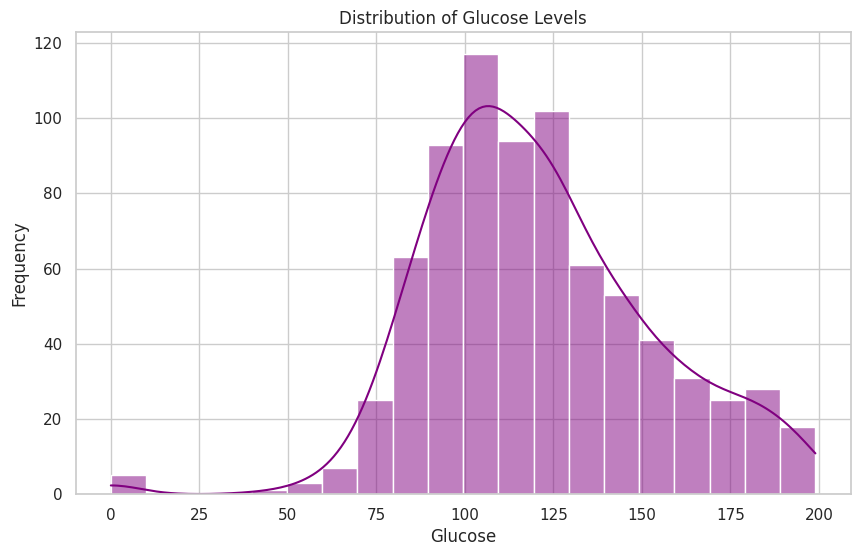

In [ ]:
# 1. Histogram for glucose levels
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], kde=True, color='purple', bins=20)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

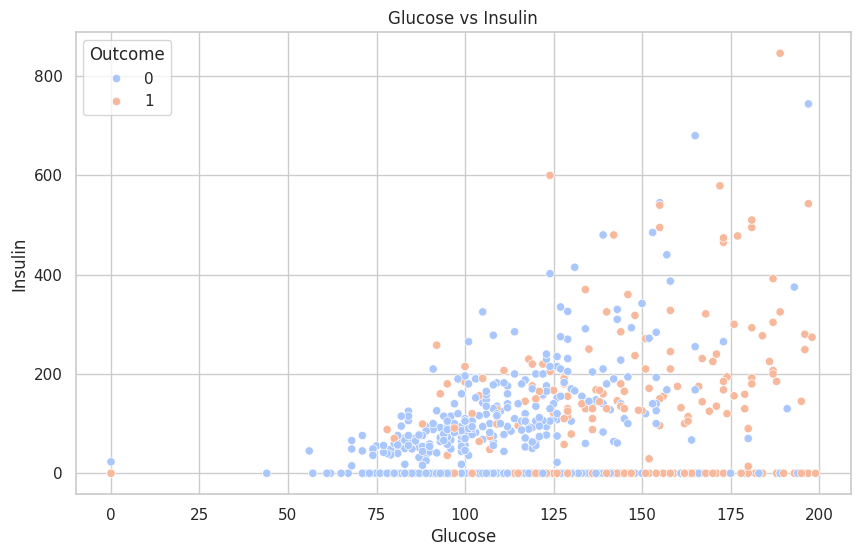

In [ ]:
# 2. Scatter plot of Glucose vs. Insulin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=data, hue='Outcome', palette='coolwarm')
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

<ipython-input-27-d41e53404f25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=data, palette='Set2')


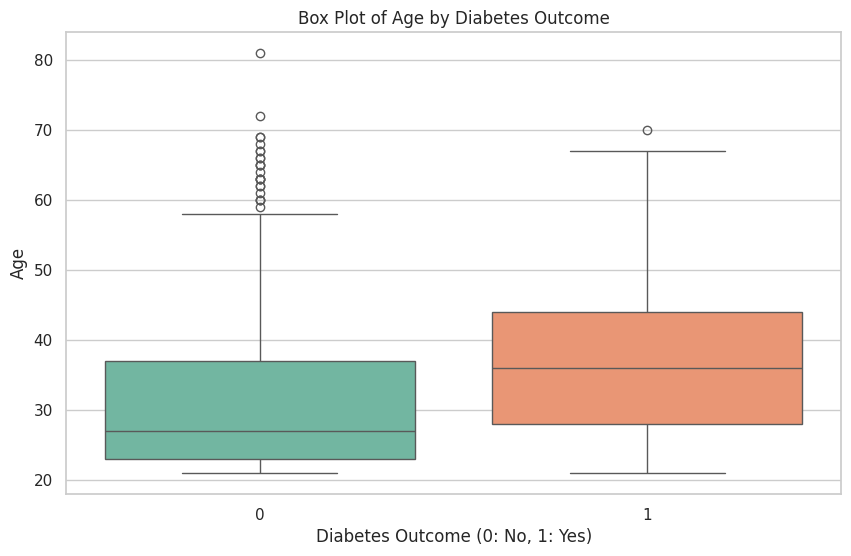

In [ ]:
# 3. Box plot of age by diabetes outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=data, palette='Set2')
plt.title('Box Plot of Age by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

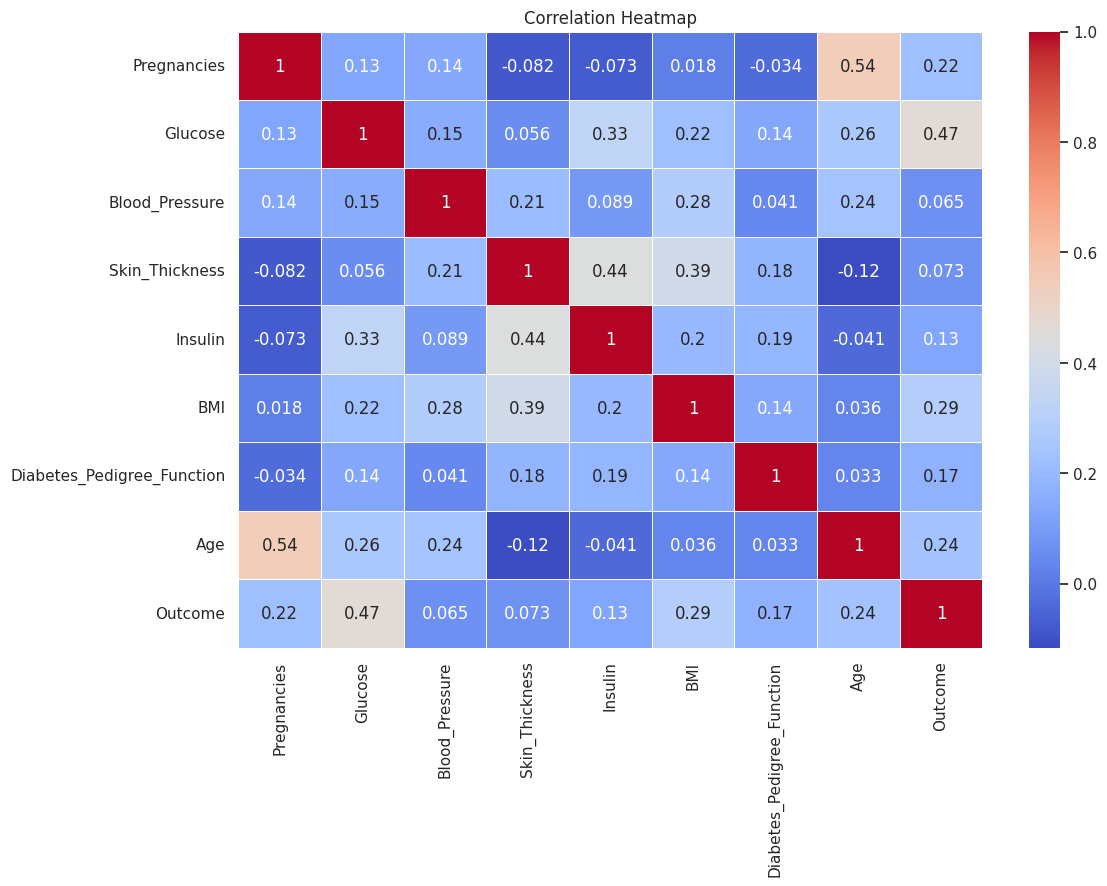

In [ ]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

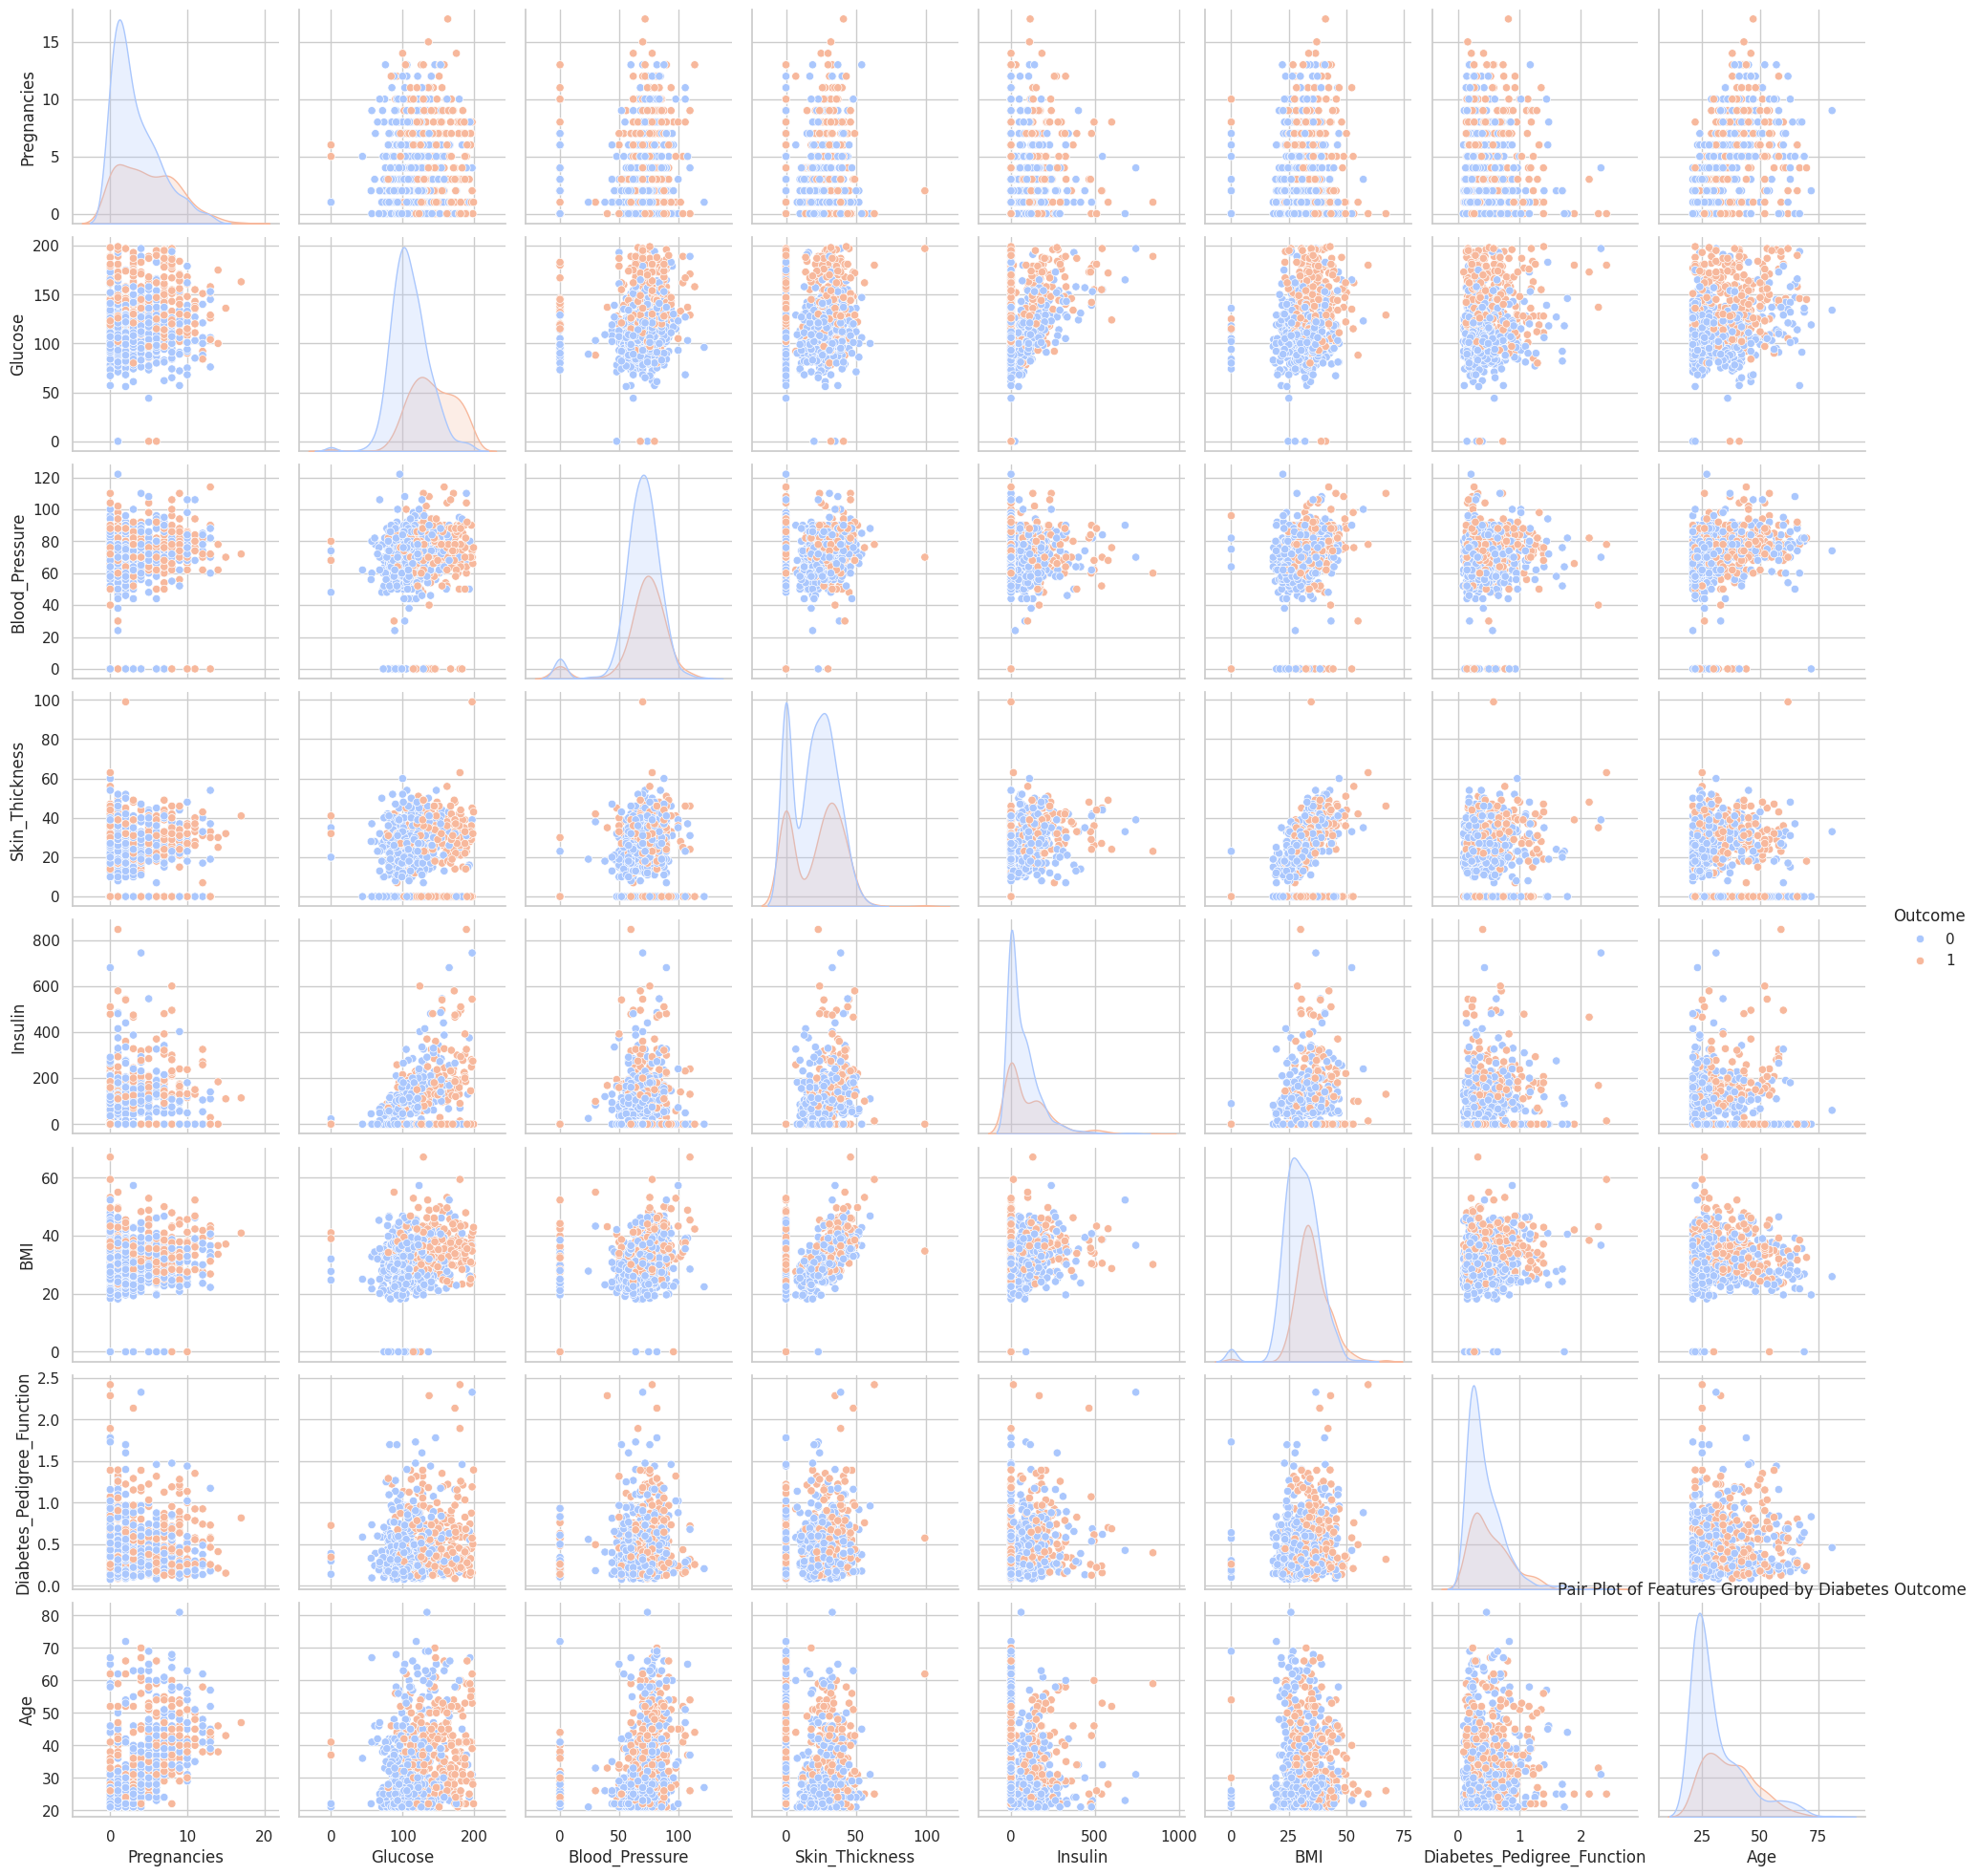

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(data, hue='Outcome', palette='coolwarm')
plt.title('Pair Plot of Features Grouped by Diabetes Outcome')
plt.show()

<ipython-input-30-8daa8acd2b65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Insulin', data=data, palette='Set2', split=True)


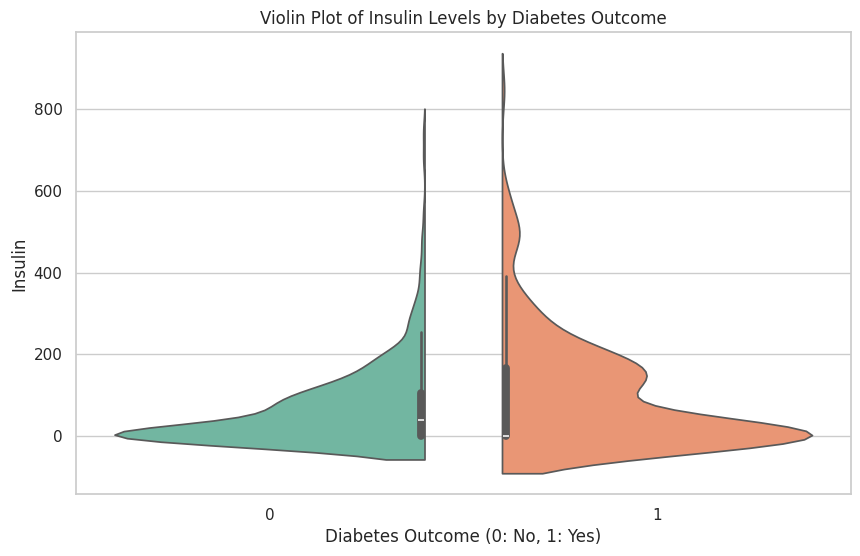

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Insulin', data=data, palette='Set2', split=True)
plt.title('Violin Plot of Insulin Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Insulin')
plt.show()

<ipython-input-31-a92f78a458f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=data, palette='Set3', split=True)


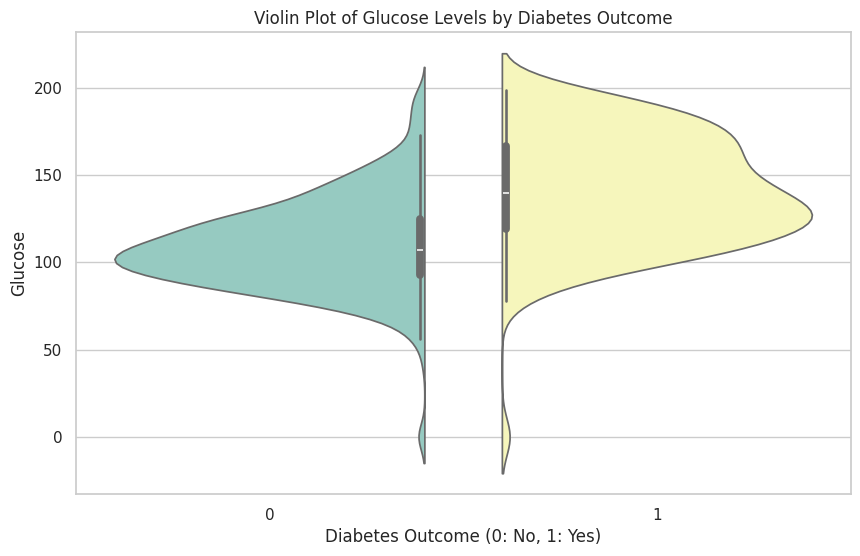

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Glucose', data=data, palette='Set3', split=True)
plt.title('Violin Plot of Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Glucose')
plt.show()

<ipython-input-32-77e996cb6b5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='Set1')


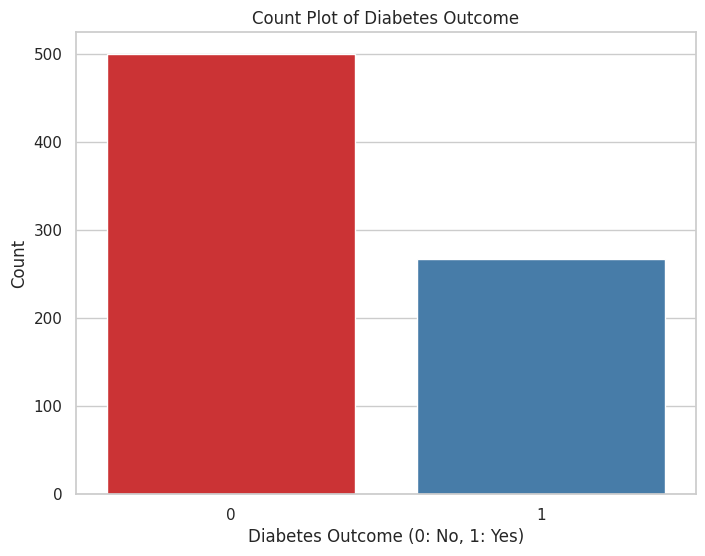

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data, palette='Set1')
plt.title('Count Plot of Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

<ipython-input-37-48e3bea83110>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='coolwarm')


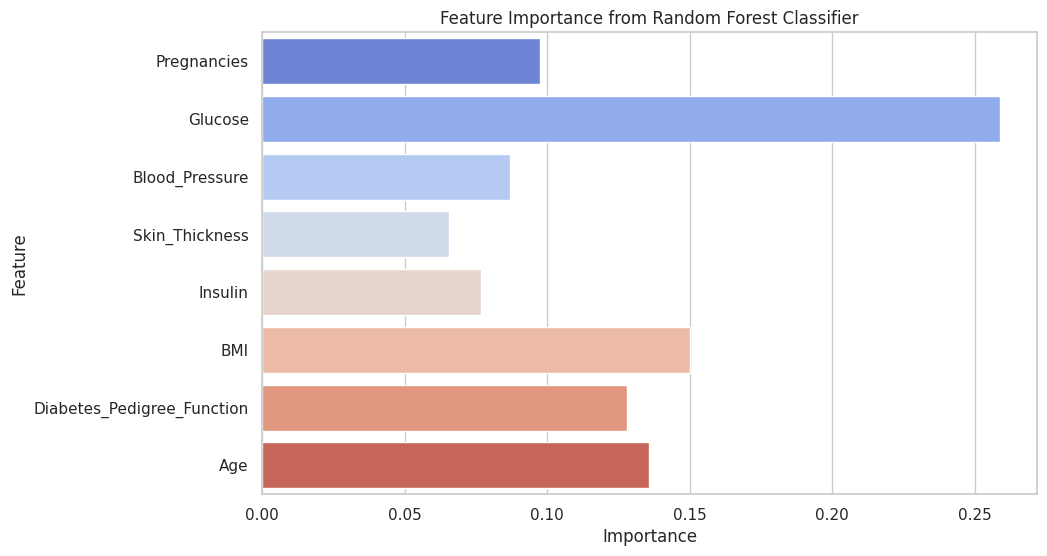

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='coolwarm')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries for advanced visualizations
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Set random seed for reproducibility
np.random.seed(42)

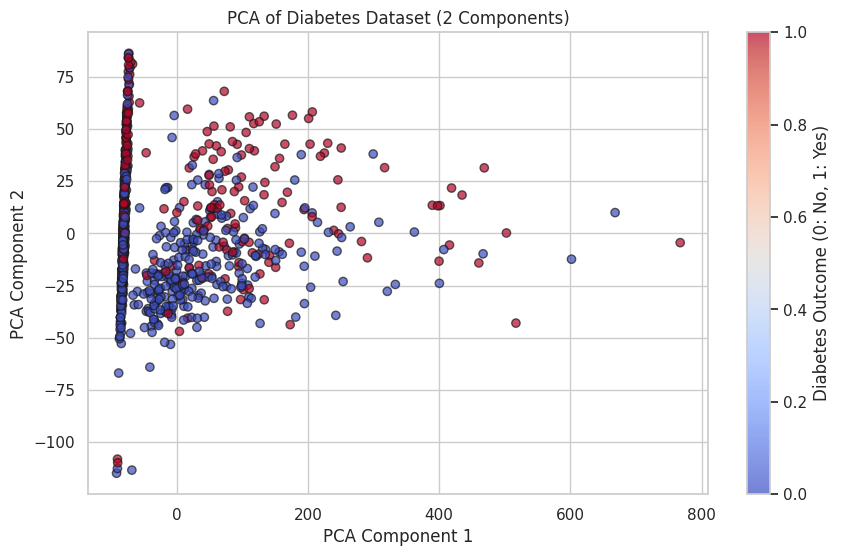

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Outcome'], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA of Diabetes Dataset (2 Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Diabetes Outcome (0: No, 1: Yes)')
plt.show()

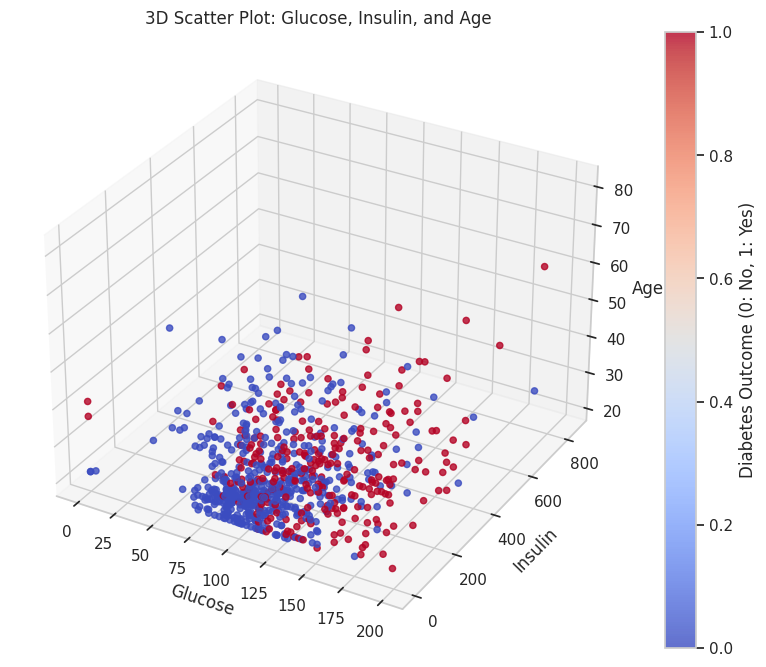

In [ ]:
# 2. 3D Scatter Plot (using Glucose, Insulin, and Age)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data['Glucose'], data['Insulin'], data['Age'], c=data['Outcome'], cmap='coolwarm', alpha=0.8)
ax.set_xlabel('Glucose')
ax.set_ylabel('Insulin')
ax.set_zlabel('Age')
plt.title('3D Scatter Plot: Glucose, Insulin, and Age')
plt.colorbar(sc, label='Diabetes Outcome (0: No, 1: Yes)')
plt.show()

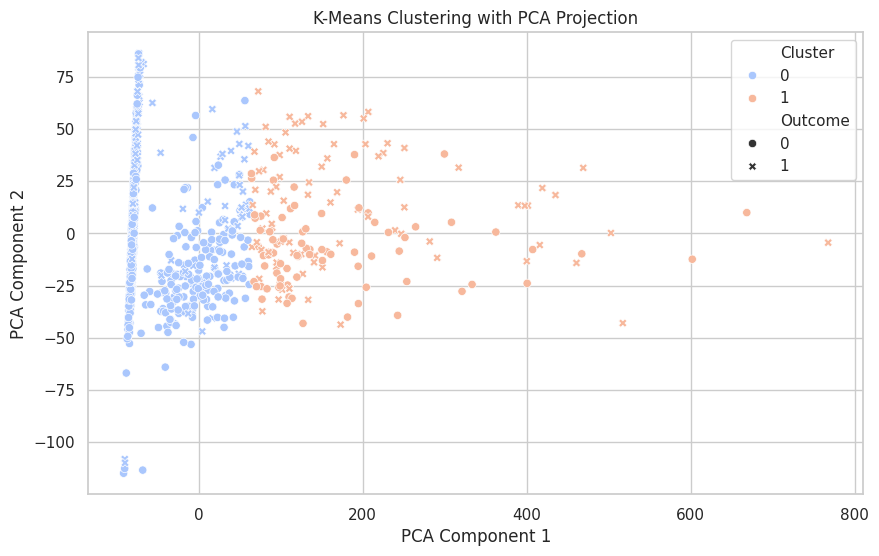

In [ ]:
# 3. K-Means Clustering (using 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

# Plot clusters using PCA for 2D projection
pca_cluster_result = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_cluster_result[:, 0], y=pca_cluster_result[:, 1], hue=data['Cluster'], palette='coolwarm', style=data['Outcome'])
plt.title('K-Means Clustering with PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

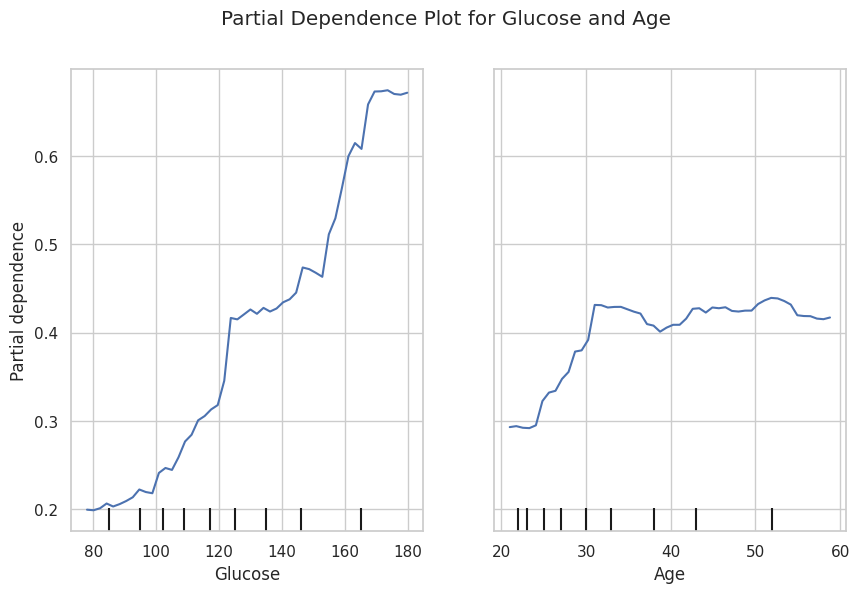

In [ ]:
# Import libraries for advanced visualizations
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay # Import PartialDependenceDisplay instead

# ... (Rest of the code remains the same until the PDP section) ...

# 4. Partial Dependence Plot (PDP) for Glucose and Age
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axes
display = PartialDependenceDisplay.from_estimator( # Use PartialDependenceDisplay
    rf_model, X_train, features=['Glucose', 'Age'], grid_resolution=50, ax=ax
)
display.figure_.suptitle('Partial Dependence Plot for Glucose and Age') # Set title
plt.show()

# ... (Rest of the code remains the same) ...